<a href="https://colab.research.google.com/github/jallowmodou/Data-Science-Folder/blob/master/jallowMo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [0]:
import pandas as pd

In [0]:
import matplotlib.pyplot as plt

In [0]:
import seaborn as sns

In [0]:
%matplotlib inline

In [43]:
!pip install geopandas

     |████████████████████████████████| 901kB 2.8MB/s 
     |████████████████████████████████| 17.9MB 32.3MB/s 
     |████████████████████████████████| 11.2MB 37.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


In [0]:
import geopandas as gpd

In [60]:
!pip install geoplot

  Using cached https://files.pythonhosted.org/packages/72/c2/da48334c5c762ea86f881bdf49a61ad44f87eb2cb36acb5e4262f70d40ef/geoplot-0.2.4.tar.gz
  Using cached https://files.pythonhosted.org/packages/e5/92/fe8838fa8158931906dfc4f16c5c1436b3dd2daf83592645b179581403ad/Cartopy-0.17.0.tar.gz
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
ERROR: Command "/usr/bin/python3 /usr/local/lib/python3.6/dist-packages/pip/_vendor/pep517/_in_process.py get_requires_for_build_wheel /tmp/tmph5o6txer" failed with error code 1 in /tmp/pip-install-o9ucnsv1/cartopy


In [61]:
import geoplot.crs as gcrs

ModuleNotFoundError: ignored

In [8]:
from google.colab import files
uploaded = files.upload()

Saving training.csv to training.csv


In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded['training.csv']))

In [10]:
data.head()

,geohash6,day,timestamp,demand
0,qp03wc,18,20:0,0.020072
1,qp03pn,10,14:30,0.024721
2,qp09sw,9,6:15,0.102821
3,qp0991,32,5:0,0.088755
4,qp090q,15,4:0,0.074468


In [11]:
!pip install pygeohash

  Stored in directory: /root/.cache/pip/wheels/3f/5f/14/989d83a271207dda28232746d63e737a2dbd88ea7f7a9db807
Successfully built pygeohash


In [0]:
import pygeohash as pgh

In [0]:
data['geohash'] = data.apply(lambda x: pgh.decode(x.geohash6), axis=1)

In [0]:
data['timestamp'] = data.timestamp.str.replace(':', '').astype(float)

In [15]:
data.head()

,geohash6,day,timestamp,demand,geohash
0,qp03wc,18,200.0,0.020072,"(-5.35, 90.7)"
1,qp03pn,10,1430.0,0.024721,"(-5.41, 90.7)"
2,qp09sw,9,615.0,0.102821,"(-5.33, 90.9)"
3,qp0991,32,50.0,0.088755,"(-5.35, 90.8)"
4,qp090q,15,40.0,0.074468,"(-5.41, 90.7)"


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4206321 entries, 0 to 4206320
Data columns (total 5 columns):
geohash6     object
day          int64
timestamp    float64
demand       float64
geohash      object
dtypes: float64(2), int64(1), object(2)
memory usage: 160.5+ MB


In [17]:
data.describe()

,day,timestamp,demand
count,4.206321e+06,4.206321e+06,4.206321e+06
mean,3.145299e+01,7.825262e+02,1.050907e-01
std,1.768278e+01,6.941350e+02,1.592655e-01
min,1.000000e+00,0.000000e+00,3.092217e-09
25%,1.600000e+01,1.400000e+02,1.867379e-02
50%,3.200000e+01,6.300000e+02,5.043463e-02
75%,4.700000e+01,1.245000e+03,1.208644e-01
max,6.100000e+01,2.345000e+03,1.000000e+00


In [41]:
data['lat'] = [loc[0] for loc in data.geohash]
data['lng'] = [loc[1] for loc in data.geohash]
data.head()

,geohash6,day,timestamp,demand,geohash,lat,lng
0,qp03wc,18,200.0,0.020072,"(-5.35, 90.7)",-5.35,90.7
1,qp03pn,10,1430.0,0.024721,"(-5.41, 90.7)",-5.41,90.7
2,qp09sw,9,615.0,0.102821,"(-5.33, 90.9)",-5.33,90.9
3,qp0991,32,50.0,0.088755,"(-5.35, 90.8)",-5.35,90.8
4,qp090q,15,40.0,0.074468,"(-5.41, 90.7)",-5.41,90.7


In [53]:
data.plot(data , cmap = 'BuGn')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

ValueError: ignored

In [54]:
geoplot.choropleth(data, hue='gdp_pp', cmap='Greens', figsize=(8, 4))

NameError: ignored

In [0]:
#EXPLORATORY DATA ANALYSIS (E.D.A)

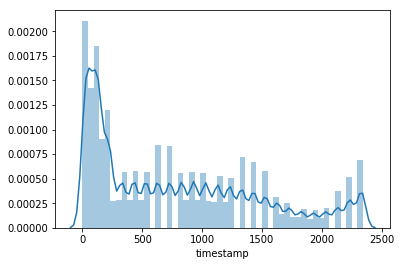

In [19]:
sns.distplot(data['timestamp'])

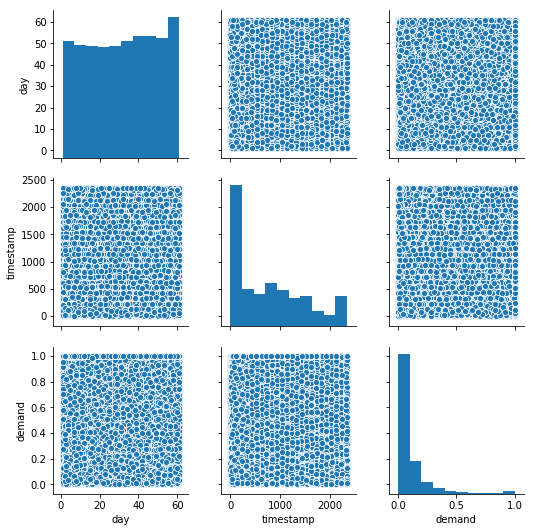

In [20]:
sns.pairplot(data)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = data[['day', 'demand','timestamp' ]]
y = data['timestamp']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

#Training a Decision Tree Model


In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dtree = DecisionTreeClassifier()

In [26]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#Prediction and Evaluation of Decision Tree

In [0]:
predictions = dtree.predict(X_test)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     14439
        10.0       1.00      1.00      1.00     15695
        15.0       1.00      1.00      1.00     14891
        20.0       1.00      1.00      1.00     16157
        30.0       1.00      1.00      1.00     31139
        40.0       1.00      1.00      1.00     16820
        45.0       1.00      1.00      1.00     15471
        50.0       1.00      1.00      1.00     16983
        60.0       1.00      1.00      1.00     16737
        70.0       1.00      1.00      1.00     16733
        80.0       1.00      1.00      1.00     16611
        90.0       1.00      1.00      1.00     17257
       100.0       1.00      1.00      1.00     16611
       110.0       1.00      1.00      1.00     16351
       115.0       1.00      1.00      1.00     15680
       120.0       1.00      1.00      1.00     15805
       130.0       1.00      1.00      1.00     30744
       140.0       1.00    

In [30]:
print(confusion_matrix(y_test,predictions))

[[14439     0     0 ...     0     0     0]
 [    0 15695     0 ...     0     0     0]
 [    0     0 14891 ...     0     0     0]
 ...
 [    0     0     0 ... 13027     0     0]
 [    0     0     0 ...     0 13499     0]
 [    0     0     0 ...     0     0 14235]]


In [0]:
from sklearn import metrics

In [32]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 0.0


In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MAE: 0.0
MSE: 0.0


In [0]:
tp = sum(np.logical_and(y_test==1, predictions==1))
tn = sum(np.logical_and(y_test==0, predictions==0))

In [0]:
count_pos = sum(y==1)
count_neg = sum(y==0)
count = len(y)

In [36]:
ac1 = (tp+tn)/count
ac2 = metrics.accuracy_score(y_test, predictions)
print(f"Accuarcy (manual): {ac1}")
print(f"Accuarcy (from sklearn import metrics): {ac2}")

Accuarcy (manual): 0.003432690942987946
Accuarcy (from sklearn import metrics): 1.0


In [0]:
#AM SUPER SORRY AM A 2ND YEAR UNIVERSITY STUDENT MAJORING IN EEE, AM ON EXAMS DIDNT HAVE ENOUGH TIME FOR RESEARCH...THANKS ANYWAYS........HAVE LEARNT ALOT THOUUUUUU..THANKS